# Exercise


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import netCDF4 as nc

## Text Data
-  Load the data from `../../data/nao_station_monthly.txt`. Mask every missing value. Therefore you will need the following parameters of the function np.genfromtxt:

    -   skip_header
    -   missing_values
    -   usemask

In [2]:
infile = 'data/nao_station_monthly.txt'
nao = np.genfromtxt(infile, skip_header=2, missing_values='-999', usemask=True)
print(nao)

[[1865.0 -0.6 -1.2 ... -2.0 -0.9 0.8]
 [1866.0 0.5 0.8 ... -0.3 -0.5 0.2]
 [1867.0 -3.5 1.1 ... 2.2 -3.5 -0.1]
 ...
 [2016.0 0.0 2.4 ... -1.2 1.0 0.9]
 [2017.0 -0.4 1.2 ... 0.7 -1.2 0.8]
 [2018.0 2.4 0.9 ... -999.0 -999.0 -999.0]]


-  Restructure the loaded data as arrays. Create a time vector (1D-array) called `time` and a 1D data vector called `nao`. Use the code below to plot the NAO time series.

In [3]:
time = np.genfromtxt(infile, skip_header=2, usecols=0 )
nao = np.genfromtxt(infile, skip_header=2, missing_values='-999', usemask=True, usecols=(1,2,3,4,5,6,7,8,9,10,11,12))

 -  Describe the data in the `nao` variable? (i.e. what is the shape and what is it's physical meaning?)

In [4]:
print('The shape of the `nao` variable is', np.shape(nao),'meaning that there is 154 years each containing 12 values of an NAO index\ncorresponding to the value in each month')

The shape of the `nao` variable is (154, 12) meaning that there is 154 years each containing 12 values of an NAO index
corresponding to the value in each month


 - Plot the November and December NAO index's for the year 2010 and 2015 (*Hint - use np.where to find the index in the time array and use this to find the corresponding value in the nao variable*).
    The NAO index directly correlates to the amount of rainfall and or cold weather experienced in the UK. A large negative index would create very cold conditions. Can you identify which year produced very cold conditions in the winter months (Nov, Dec, Jan)?

In [5]:
ind2010 = np.where(time==2010)
ind2015 = np.where(time==2015)

print(ind2010,ind2015)

(array([145]),) (array([150]),)


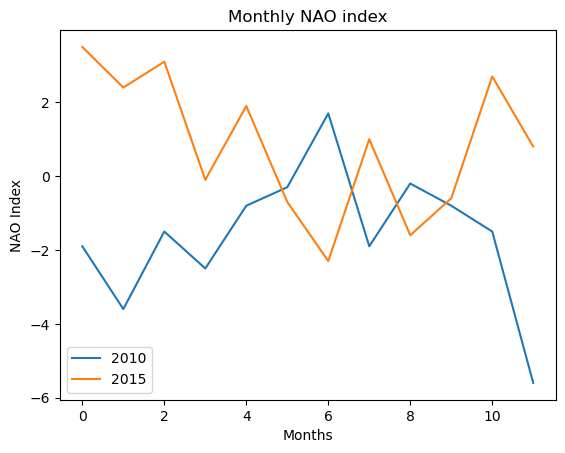

In [6]:
plt.plot(nao[145,:])
plt.plot(nao[150,:])

plt.xlabel('Months')
plt.ylabel('NAO Index')
plt.title('Monthly NAO index')
plt.legend(('2010','2015'))
plt.show()

## Pandas
- Open the same nao dataset above, but using the pandas package instead. Use the pandas `read_csv()` function to read the dataset into the notebook as a Pandas DataFrame.
   <br> Note: <br> - You can use skiprows to ignore the header <br> - The delimiter has two spaces <br> - You can use `.head()` to view the first 5 entries in the DataFrame

In [7]:
nao = pd.read_csv(infile, skiprows=1, delimiter='  ')
nao.head()

/var/folders/00/mbljds6d1413pvwmjgfcmg680000gn/T/ipykernel_39793/2421226872.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  nao = pd.read_csv(infile, skiprows=1, delimiter='  ')


,year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,1865,-0.6,-1.2,0.2,-0.2,-0.4,0.0,0.5,1.5,1.8,-2.0,-0.9,0.8
1,1866,0.5,0.8,-0.6,-2.3,-2.0,0.9,-0.5,-0.2,2.4,-0.3,-0.5,0.2
2,1867,-3.5,1.1,-4.3,1.8,-4.2,0.1,-2.0,1.9,1.4,2.2,-3.5,-0.1
3,1868,0.7,3.0,3.6,1.7,2.3,3.1,0.4,1.5,-2.8,3.5,-1.8,-0.1
4,1869,1.0,2.5,0.2,-0.2,-2.7,-1.9,-0.3,-1.0,-0.4,-1.4,1.4,0.0


- Create the variables `time` and `Jan` using the appropriate columns in the DataFrame.  You can use `.iloc[]` to specify the column by index, e.g. `nao.iloc[:,1]`. What data type are these new variables?

In [10]:
time = nao.iloc[:,0]
Jan = nao.iloc[:,1]

type(time)

pandas.core.series.Series

- Visualise the NAO index for January

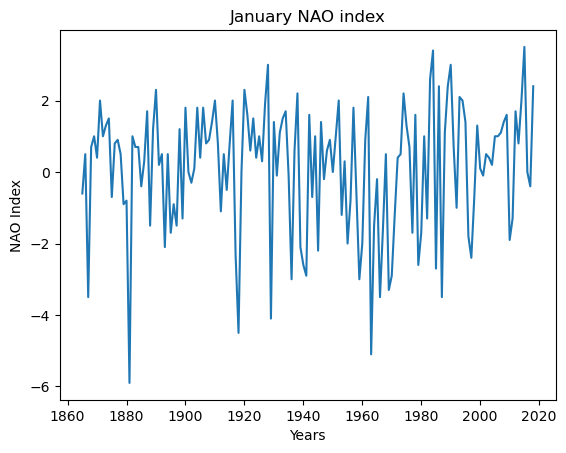

In [11]:
plt.plot(time,Jan)
plt.xlabel('Years')
plt.ylabel('NAO Index')
plt.title('January NAO index')
plt.show()

## NetCDF data

-   Open the dataset `../../data/CRUTEM.4.6.0.0.anomalies.nc`

In [20]:
infile = 'data/CRUTEM.4.6.0.0.anomalies.nc'
ds = nc.Dataset(infile, clobber=True, mode='a')
print(ds)

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF3_CLASSIC data model, file format NETCDF3):
    title: CRUTEM4 temperature anomalies
    institution: Climatic Research Unit, University of East Anglia/Met Office Hadley Centre
    history: 
    source: 
    comment: 
    reference: Jones, P. D., D. H. Lister, T. J. Osborn, C. Harpham, M. Salmon, and C. P. Morice (2012), Hemispheric and large-scale land-surface air temperature variations: An extensive revision and an update to 2010, J. Geophys. Res., 117, D05127, doi:10.1029/2011JD017139
    version: CRUTEM.4.6.0.0
    Conventions: CF-1.0
    dimensions(sizes): latitude(36), longitude(72), time(2029), field_status_string_length(1)
    variables(dimensions): float32 latitude(latitude), float32 longitude(longitude), float32 time(time), float32 temperature_anomaly(time, latitude, longitude), |S1 field_status(time, field_status_string_length)
    groups: 


-  Inspect the content of the attributes `dimensions` and `variables`. How long are the dimensions `longitude` and `time`? Which unit and data type does the variable `temperature_anomaly` have and on which dimensions is it defined?

In [21]:
print(ds.variables['time'].size)
print(ds.variables['longitude'].size)
print(ds.variables['temperature_anomaly'].units)
print(ds.variables['temperature_anomaly'].dtype)

2029
72
K
float32


-  Read the last time step of the variable `temperature_anomaly` to the memory.

In [22]:
t_anom = ds.variables['temperature_anomaly'][-1,:,:]

-  Compute the globally averaged temperature anomaly. The data is given in spherical coordinates. Therefore single data points need to be weighted with the cosine of the latitude in radians:

    $$t_{global} = \frac{1}{N M}\sum_{j=1}^M\sum_{i=1}^{N} t_{anom}(j, i) \cos(\theta(j))$$

    Try to use the broadcasting functionality and the mean function from numpy! Use the code below to plot the time series of globally averaged temperature anomaly.

In [23]:
lats = np.radians(ds.variables['latitude'][:])
t_global = np.mean(np.transpose(t_anom) * np.cos(lats))
print(t_global)

0.9223125805558068


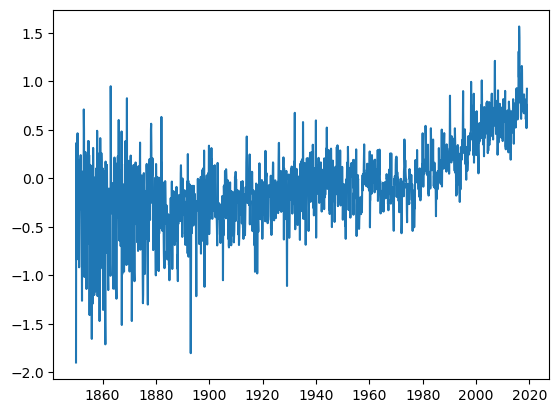

In [24]:
# create a plotable time axis
# encode numerical time representation into datetime information
# comprehensible by matplotlib
time = nc.num2date(
    ds.variables['time'][:],
    units=ds.variables['time'].units,
    calendar=ds.variables['time'].calendar,
    only_use_cftime_datetimes=False,
    only_use_python_datetimes=True
)

# create vector for each anomay
t_global_all = np.zeros(len(time))

for i in range(len(time)):
    t_anom_temp = ds.variables['temperature_anomaly'][i,:,:]
    t_global_all[i] = np.mean(np.transpose(t_anom_temp) * np.cos(lats)) # solution of previous task

plt.plot(time, t_global_all);

-  Write the computed global mean temperature anomaly time series from above with all necessary metadata as a NetCDF data set. Include as many information from the source data set as possible.

    Hint: To overwrite an existing data set, the argument `clobber=True` is needed for the creation of the data set.

In [25]:
# Create a new variable in the dataset
new_var = ds.createVariable('global_temp_anom_avg', t_global_all.dtype, ('time',))

# Assign values to the new variable
new_var[:] = t_global_all

# look a changes
print(ds)

# Close the dataset to save the changes
ds.close()

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF3_CLASSIC data model, file format NETCDF3):
    title: CRUTEM4 temperature anomalies
    institution: Climatic Research Unit, University of East Anglia/Met Office Hadley Centre
    history: 
    source: 
    comment: 
    reference: Jones, P. D., D. H. Lister, T. J. Osborn, C. Harpham, M. Salmon, and C. P. Morice (2012), Hemispheric and large-scale land-surface air temperature variations: An extensive revision and an update to 2010, J. Geophys. Res., 117, D05127, doi:10.1029/2011JD017139
    version: CRUTEM.4.6.0.0
    Conventions: CF-1.0
    dimensions(sizes): latitude(36), longitude(72), time(2029), field_status_string_length(1)
    variables(dimensions): float32 latitude(latitude), float32 longitude(longitude), float32 time(time), float32 temperature_anomaly(time, latitude, longitude), |S1 field_status(time, field_status_string_length), float64 global_temp_anom_avg(time)
    groups: 
